In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def circle(x, y, cx, cy, d):
    x = x - cx
    y = y - cy
    return np.sqrt(x**2 + y**2) - d / 2

In [3]:
def rect(x, y, cx, cy, w, h, rot):
    rot_matrix = np.array([[np.cos(rot), np.sin(rot)], [-np.sin(rot), np.cos(rot)]])
    x, y = x - cx, y - cy
    new_x = rot_matrix[0, 0] * x + rot_matrix[0, 1] * y
    new_y = rot_matrix[1, 0] * x + rot_matrix[1, 1] * y
    x = np.abs(new_x) - w / 2
    y = np.abs(new_y) - h / 2
    sdf = np.maximum(x, y)
    mask = np.logical_and(x > 0, y > 0)
    sdf[mask] = np.sqrt(x[mask] ** 2 + y[mask] ** 2)
    return sdf

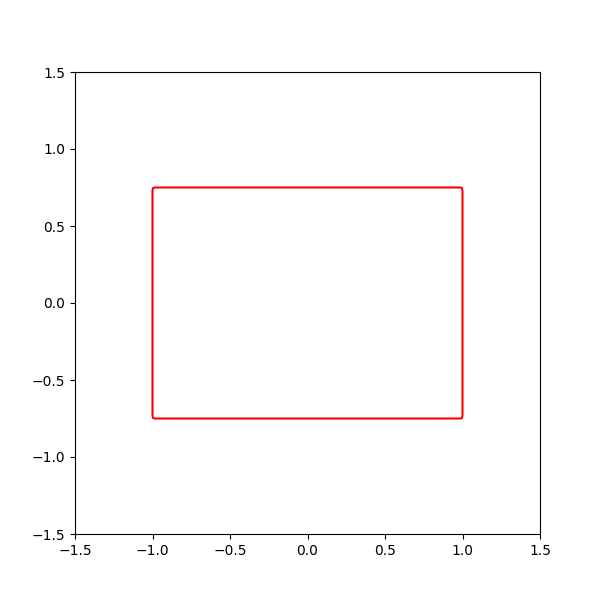

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
num_samples = 200
range = 3
x_center = 0
y_center = 0
quiver_step = 10
num_levels = 10

cmap = cm.seismic

circle_1 = lambda x, y: circle(x, y, 0, 0, 1)
rect_1 = lambda x, y: rect(x, y, 0, 0, 1, 0.1, 0)
rect_2 = lambda x, y: rect(x, y, 0.3, 1, 0.5, 0.1, -np.pi / 4)
rect_3 = lambda x, y: rect(x, y, -0.3, 1, 0.5, 0.1, np.pi / 4)
x = np.linspace(x_center-range/2, x_center+range/2, num_samples)
y = np.linspace(y_center-range/2, y_center+range/2, num_samples)
X, Y = np.meshgrid(x, y)
# Z = np.stack([rect_1(X, Y), rect_2(X, Y), rect_3(X, Y)], axis=0).min(axis=0)
# Z = circle_1(X,Y)
rect_inv = lambda x, y: -rect(x, y, 0, 0, 2, 1.5, 0)
circle_inv = lambda x, y: -circle(x, y, 0, 0, 2)
Z = rect_inv(X,Y)
# sdf_plot = ax.contour(X, Y, Z, num_levels)
surface_plot = ax.contour(X,Y,Z,[0],colors=["red"])
# fig.colorbar(sdf_plot, ax=ax)
# fig.colorbar(surface_plot, ax=ax)

In [5]:
f_x, f_y = np.gradient(Z, range / num_samples)
f_xx, f_xy = np.gradient(f_x, range / num_samples)
f_yx, f_yy = np.gradient(f_y, range / num_samples)
curvature = (f_xx*f_yy - f_xy*f_yx)/(1+f_x*f_x + f_y*f_y)

magnitude = np.sqrt(f_x ** 2 + f_y ** 2)
norm = [f_x / magnitude, f_y / magnitude]
Figure 1


In [6]:
magnitude_plot = ax.contourf(X, Y, np.log(curvature*100+1), 200)
fig.colorbar(magnitude_plot, ax=ax)
# mask = np.zeros_like(X,dtype=bool)
# mask[::quiver_step,::quiver_step] = True
# ax.quiver(X[mask], Y[mask], norm[1][mask], norm[0][mask])

/tmp/ipykernel_3895271/2604382936.py:1: RuntimeWarning: invalid value encountered in log
  magnitude_plot = ax.contourf(X, Y, np.log(curvature*100+1), 200)


In [7]:
import k3d
from k3d.colormaps import matplotlib_color_maps

plt_surface = k3d.surface(Z,
                          xmin=x_center-range/2, xmax=x_center+range/2,
                          ymin=y_center-range/2, ymax=y_center+range/2,
                          compression_level=9,
                          color_map=matplotlib_color_maps.Coolwarm_r,
                          attribute=Z, color_range=[-1, 0.5])


plot = k3d.plot()
plot += plt_surface
plot.display()

/rhome/hli/.local/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()